In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [85]:
df = pd.read_csv('Iris.csv')
df = df.sample(frac=1)
df.head(5)
df = df.drop('Id', 1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 109 to 114
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [87]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [89]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
print(df['Species'])

109    2
20     0
136    2
59     1
71     1
      ..
93     1
79     1
83     1
86     1
114    2
Name: Species, Length: 150, dtype: int64


In [90]:
x = df.iloc[:,1:5].values
y = df.iloc[:,-1].values

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 0)

In [92]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

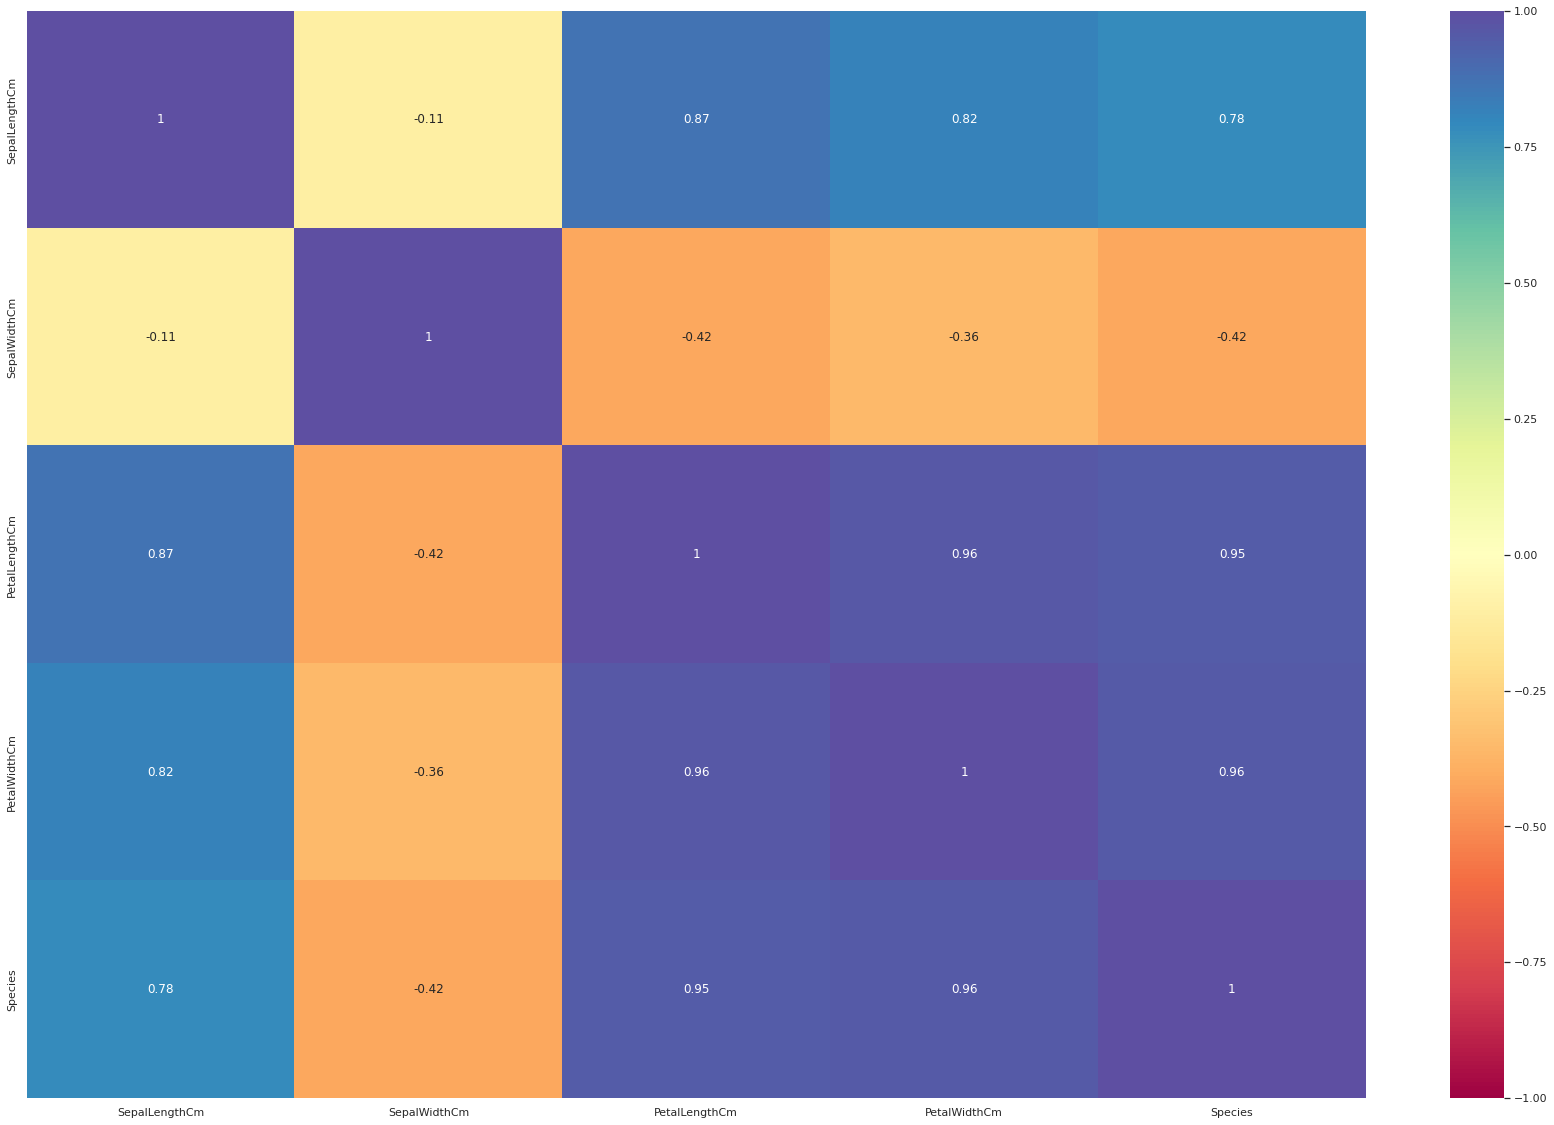

In [93]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()
plt.close()

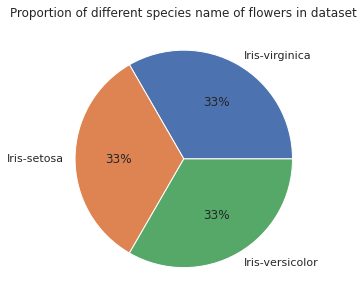

The different species of flowers are same in number in the dataset i.e.50


In [94]:
Iris_virginica =  df["Species"].value_counts()[0]
Iris_setosa =  df["Species"].value_counts()[1]
Iris_versicolor = df["Species"].value_counts()[2]
plt.figure(figsize=(5,5))
plt.pie(df["Species"].value_counts().values,labels=['Iris-virginica',
                                                    'Iris-setosa',
                                                    'Iris-versicolor'], autopct="%1.0f%%")
plt.title("Proportion of different species name of flowers in dataset")
plt.show()
print("The different species of flowers are same in number in the dataset i.e." + str(Iris_virginica))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9519d5790>,
      dtype=object)

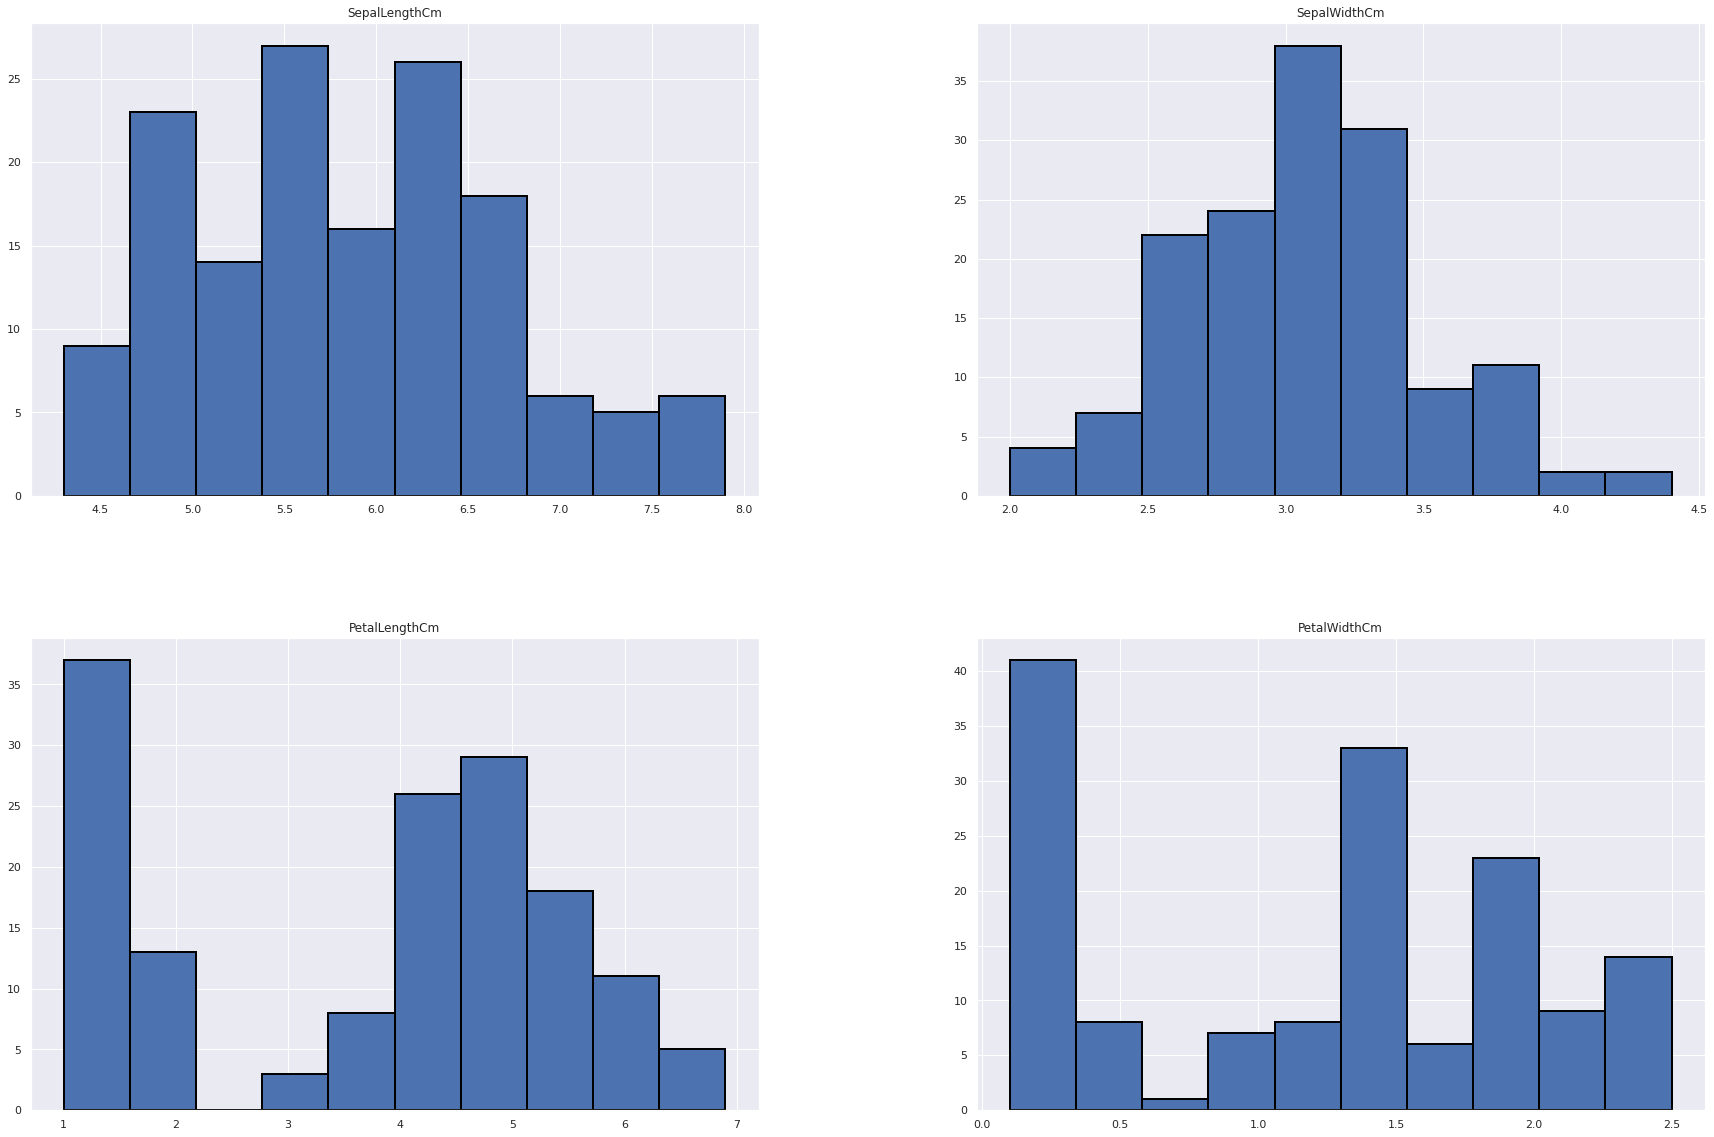

In [95]:
df.iloc[:,0:4].hist(edgecolor='black', linewidth=2)

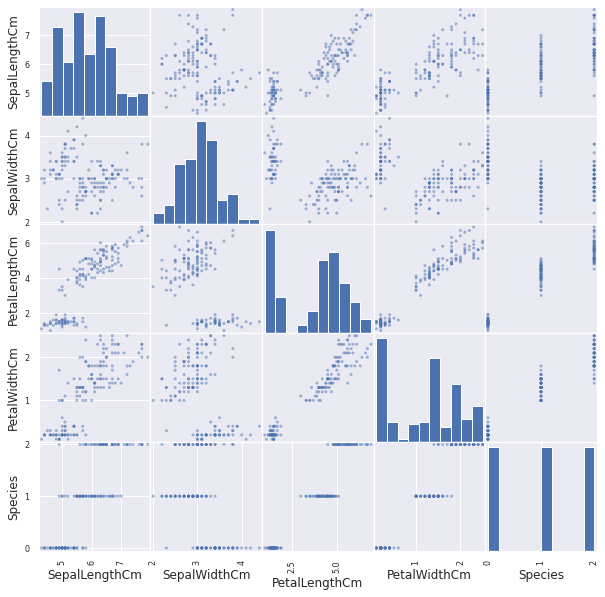

In [96]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10))
plt.show()

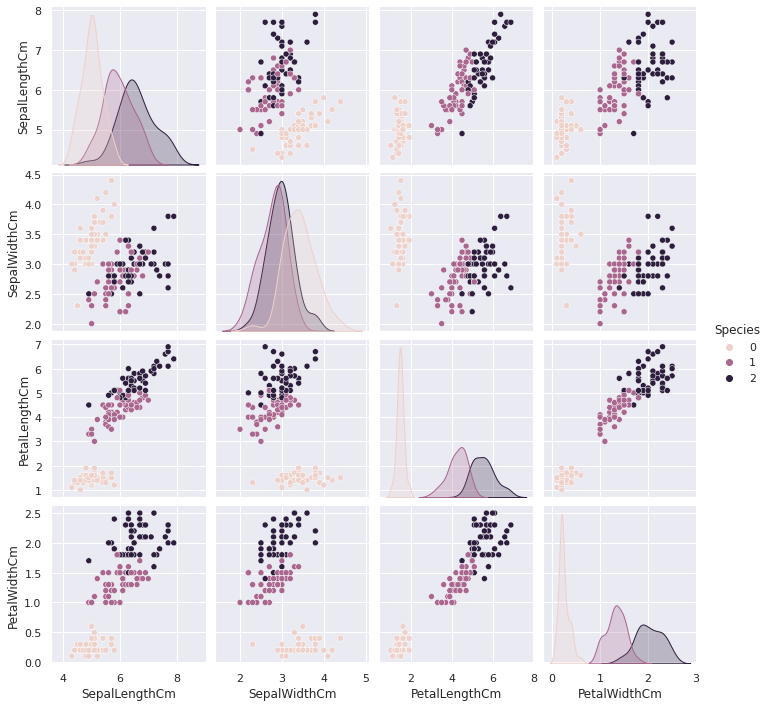

In [97]:
sns.pairplot(df, hue="Species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc95160db10>,
      dtype=object)

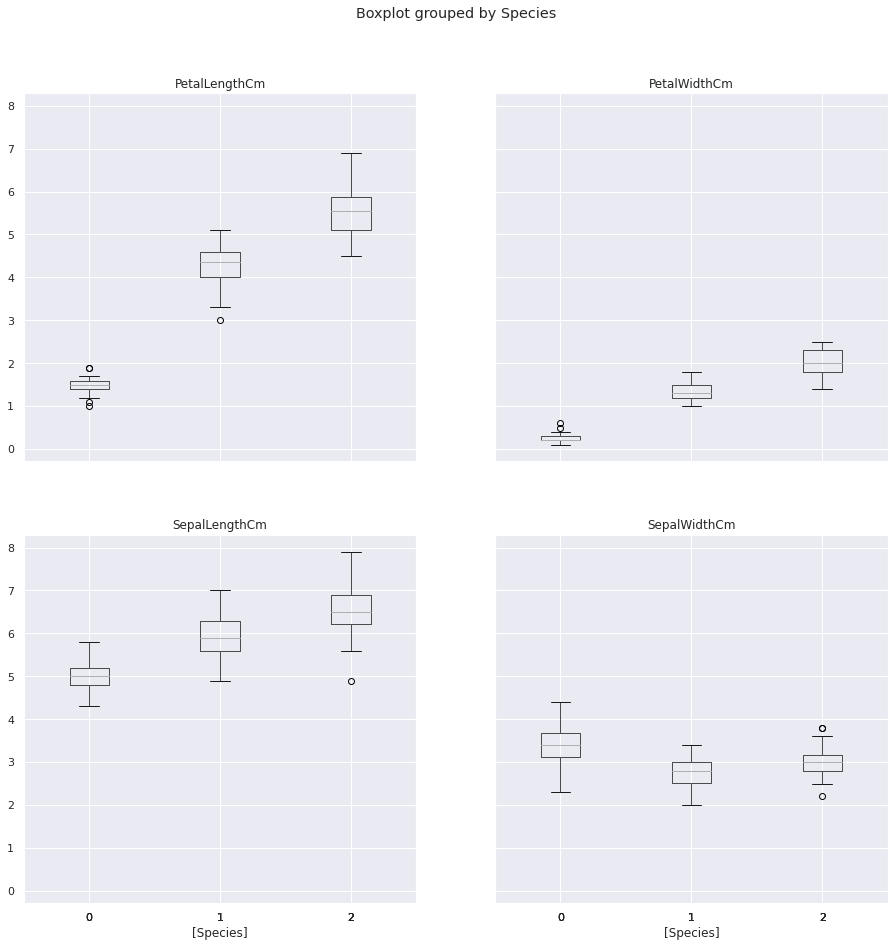

In [98]:
df.boxplot(by="Species",figsize=(15,15))

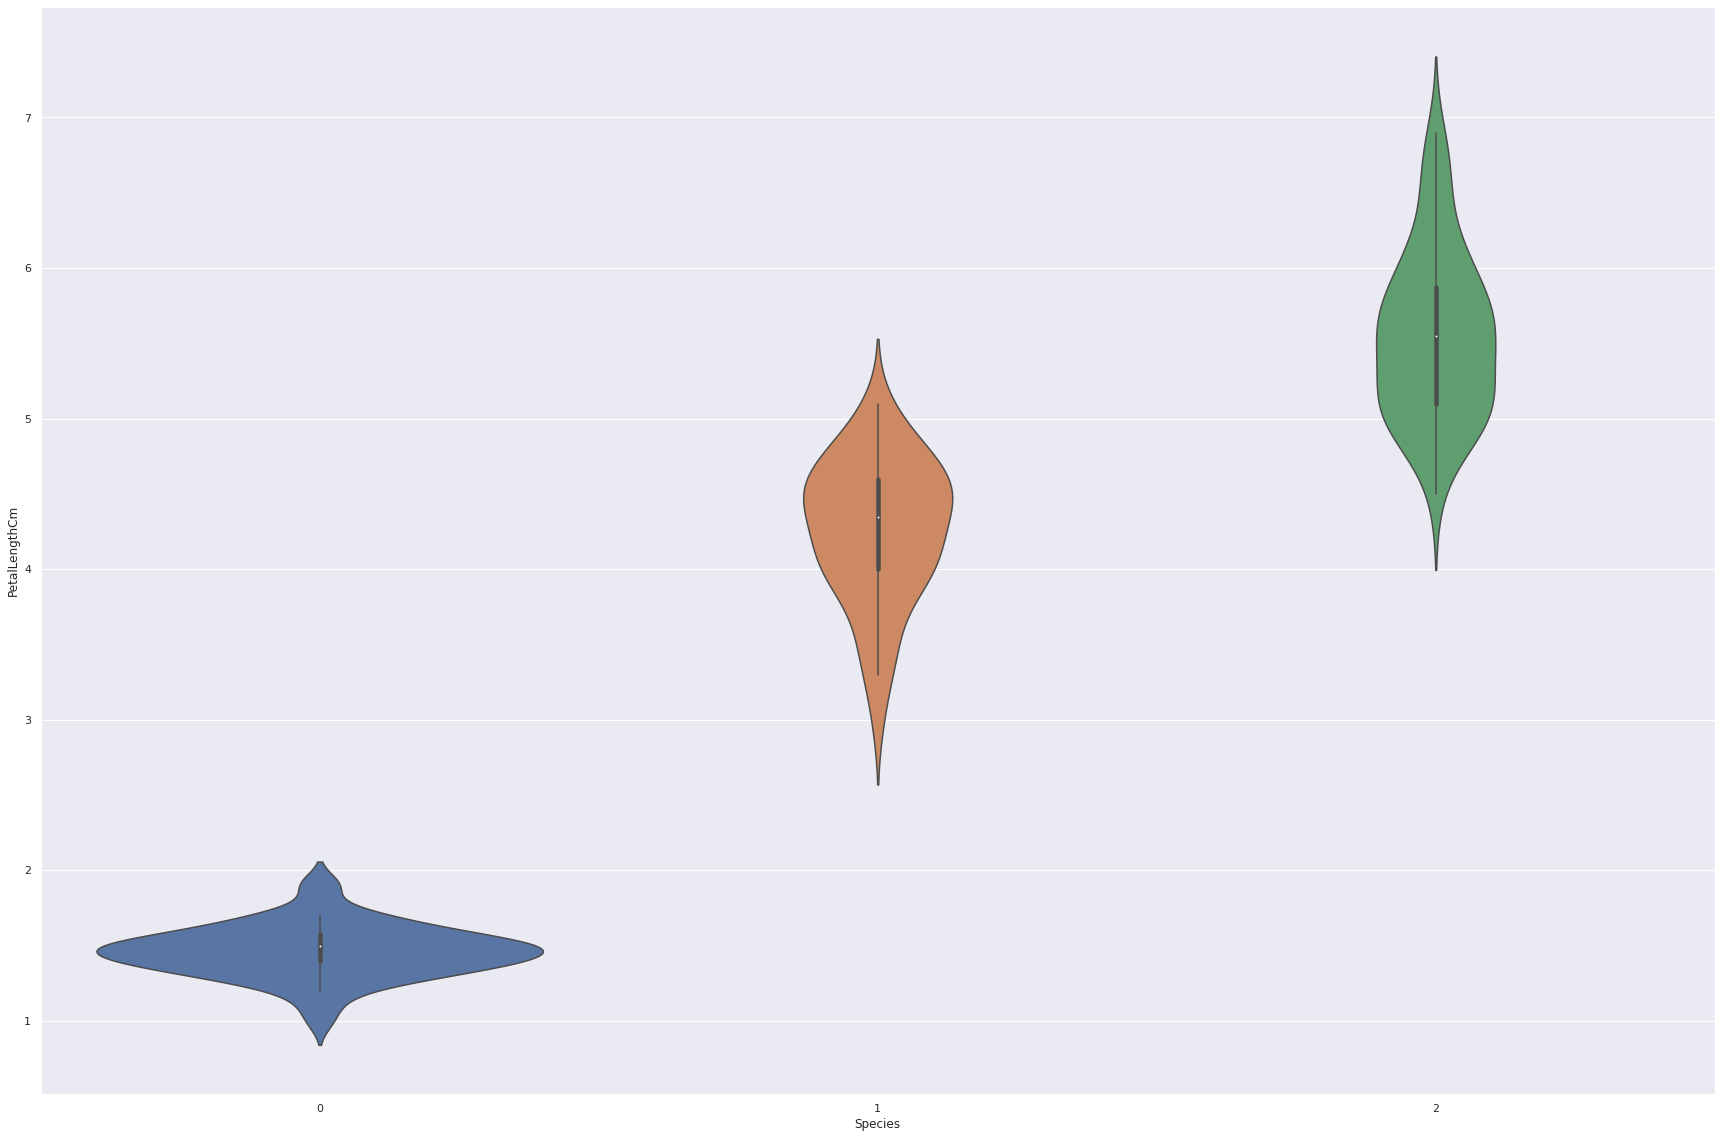

In [99]:
sns.violinplot(data=df,x="Species", y="PetalLengthCm")

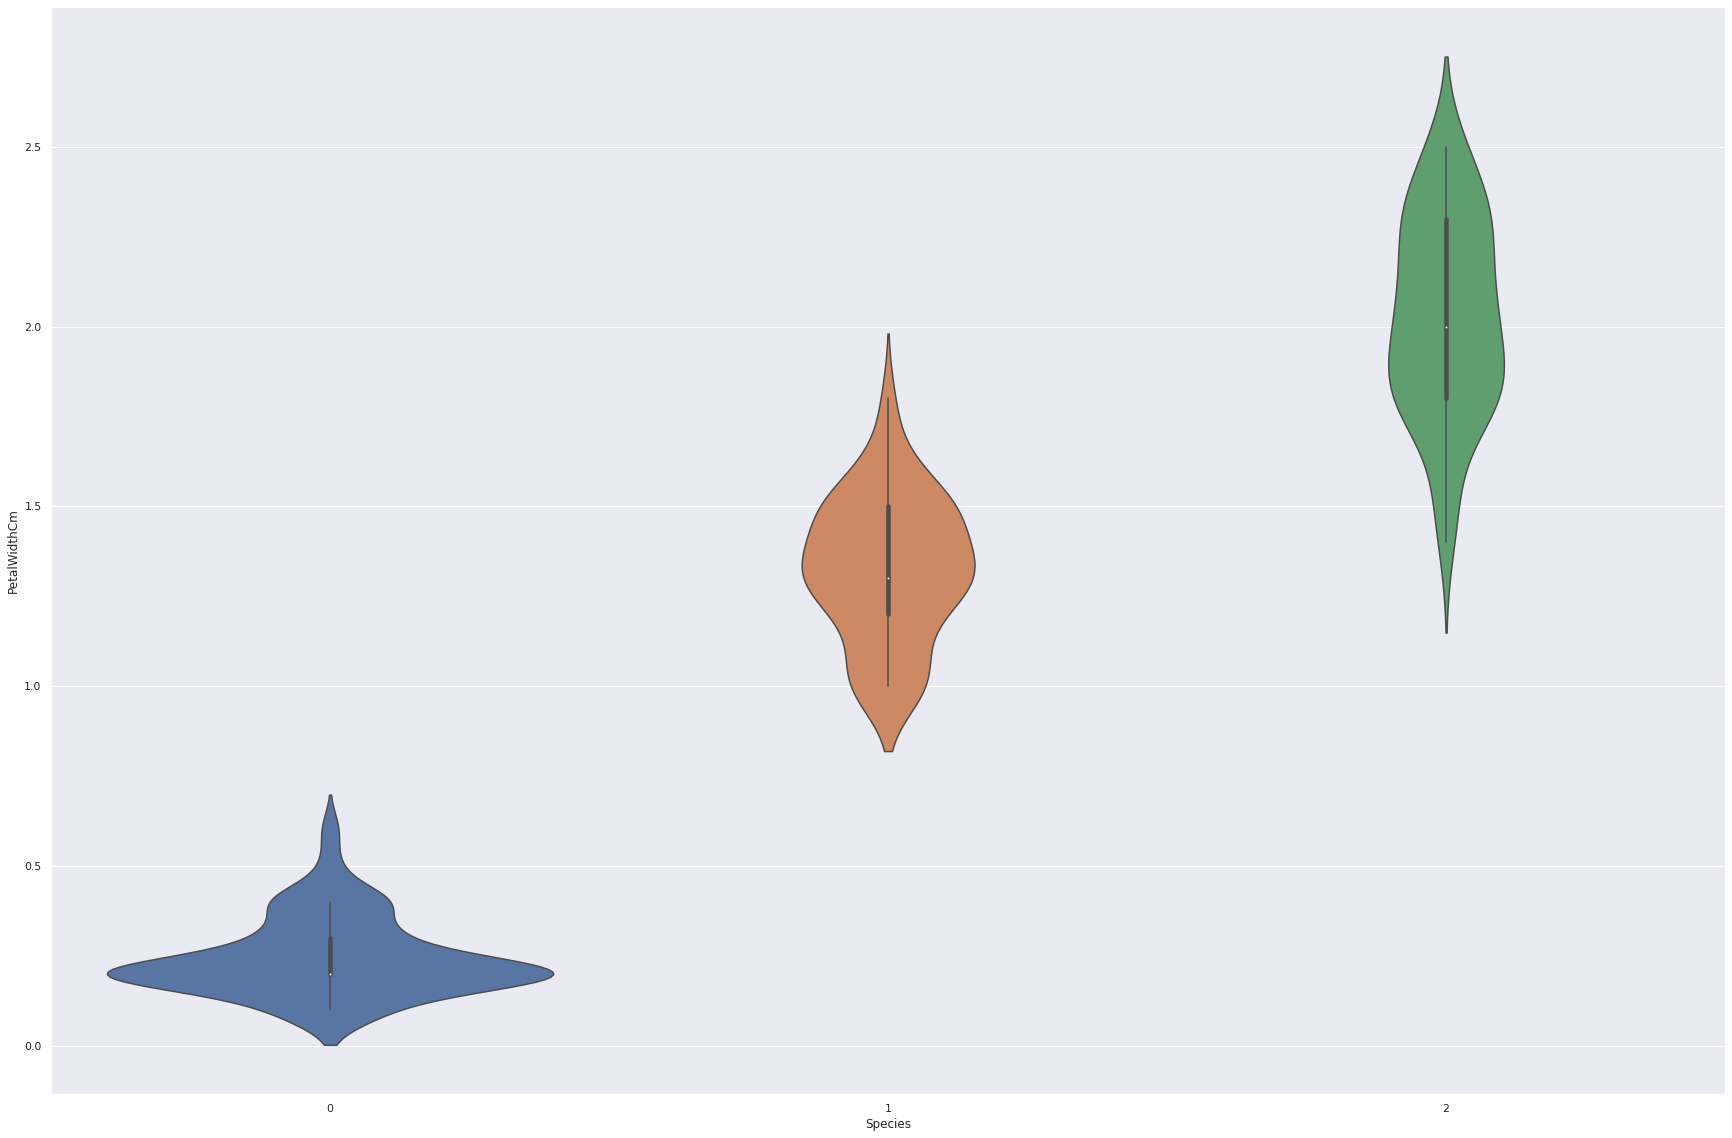

In [100]:
sns.violinplot(data=df,x="Species", y="PetalWidthCm")

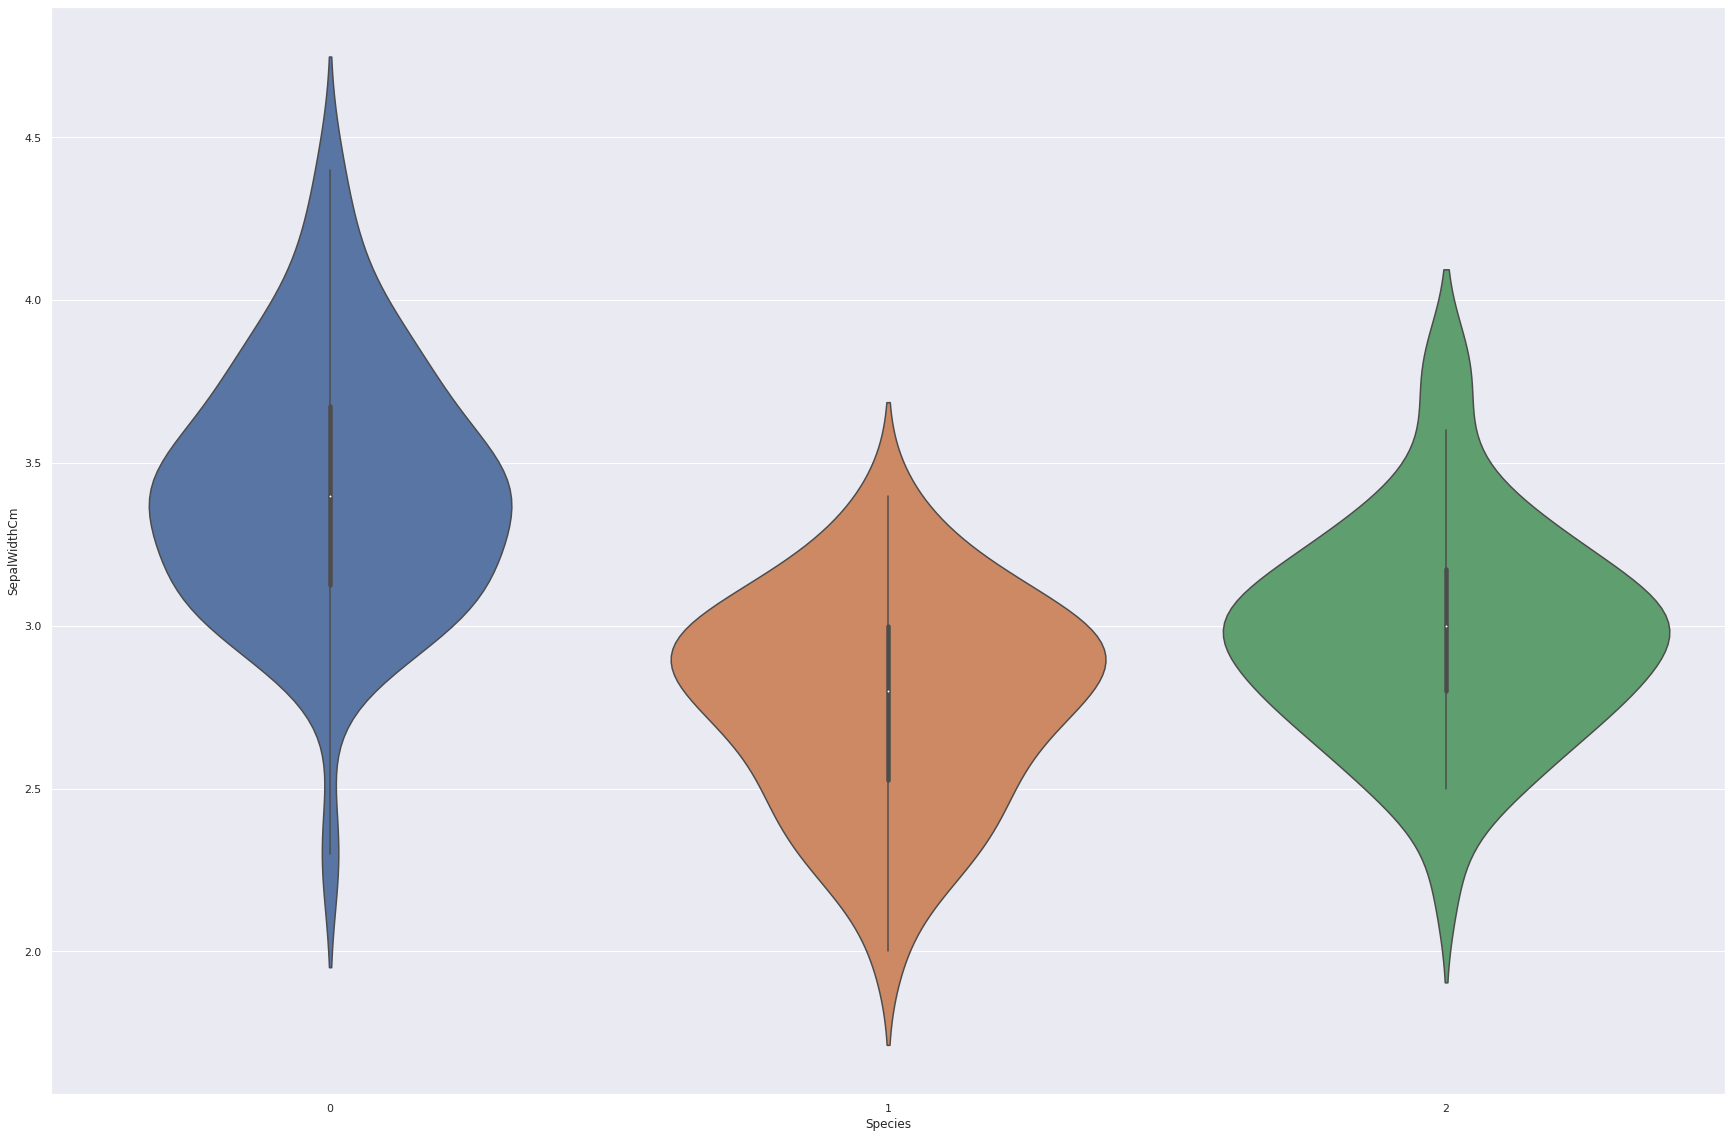

In [101]:
sns.violinplot(data=df,x="Species", y="SepalWidthCm")

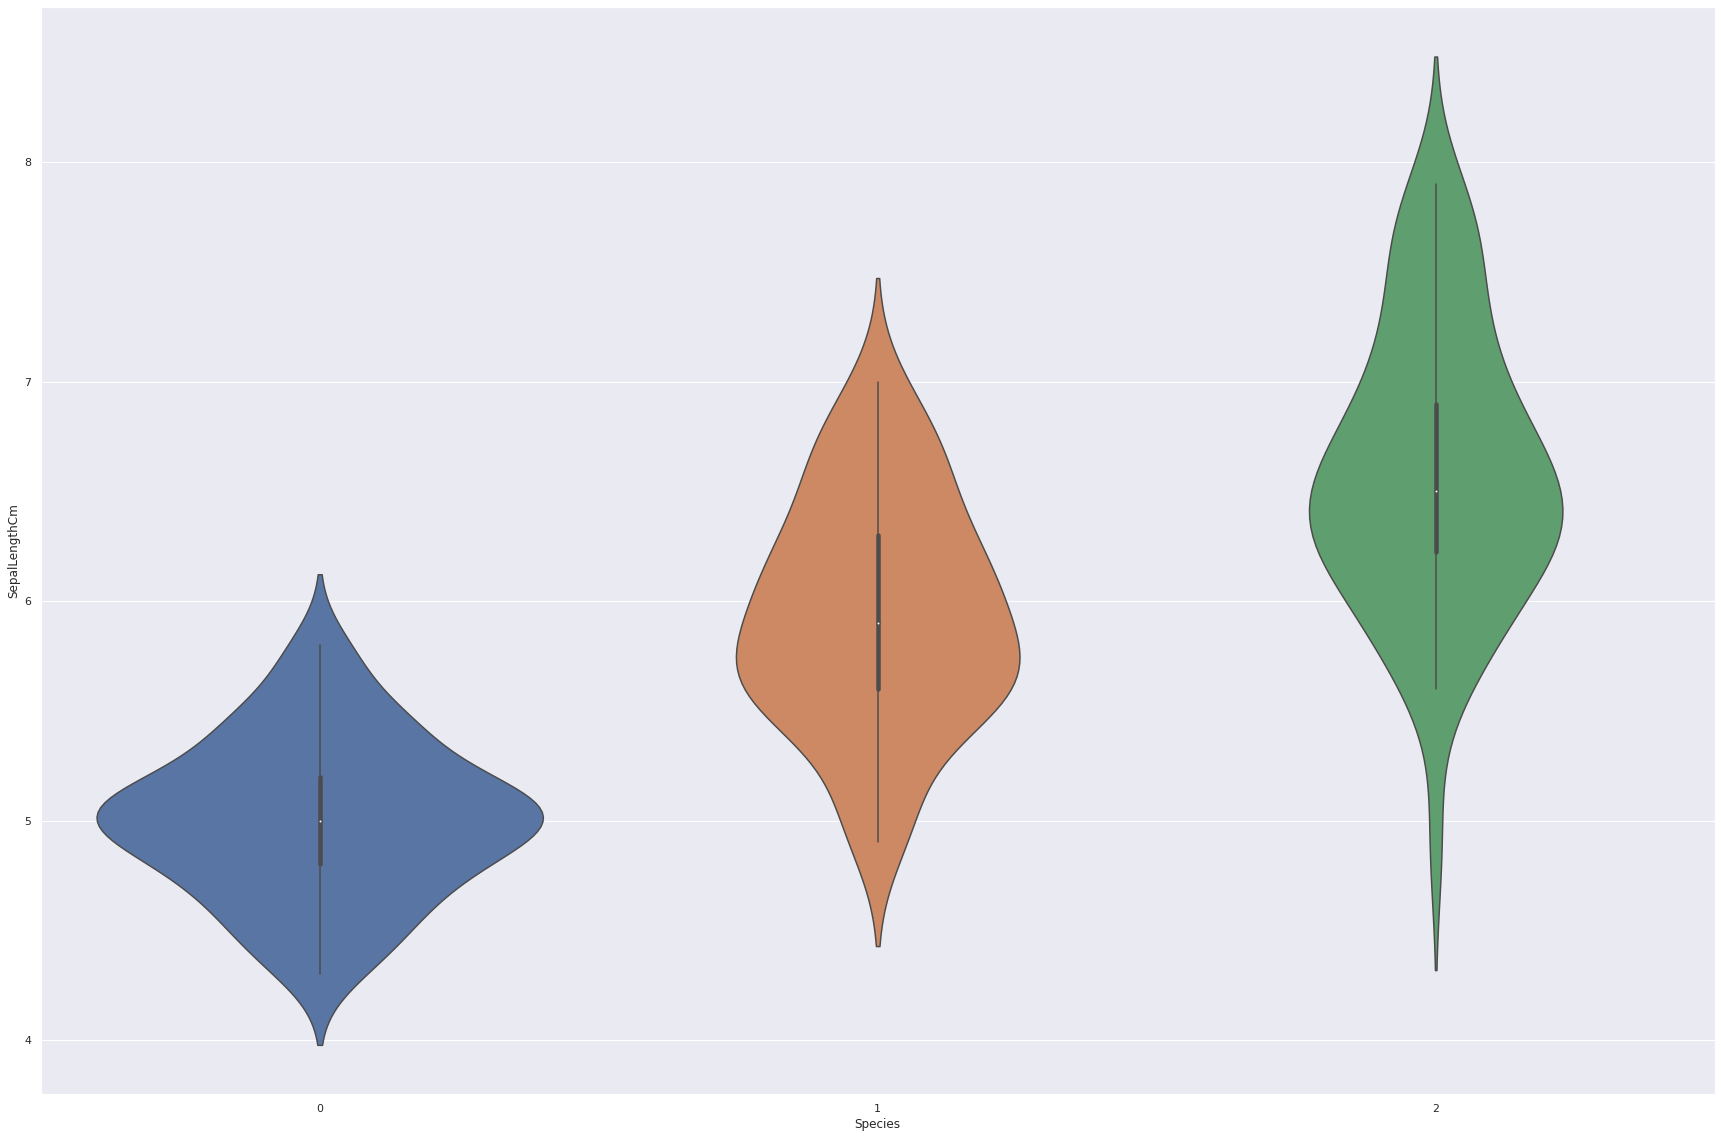

In [102]:
sns.violinplot(data=df,x="Species", y="SepalLengthCm")

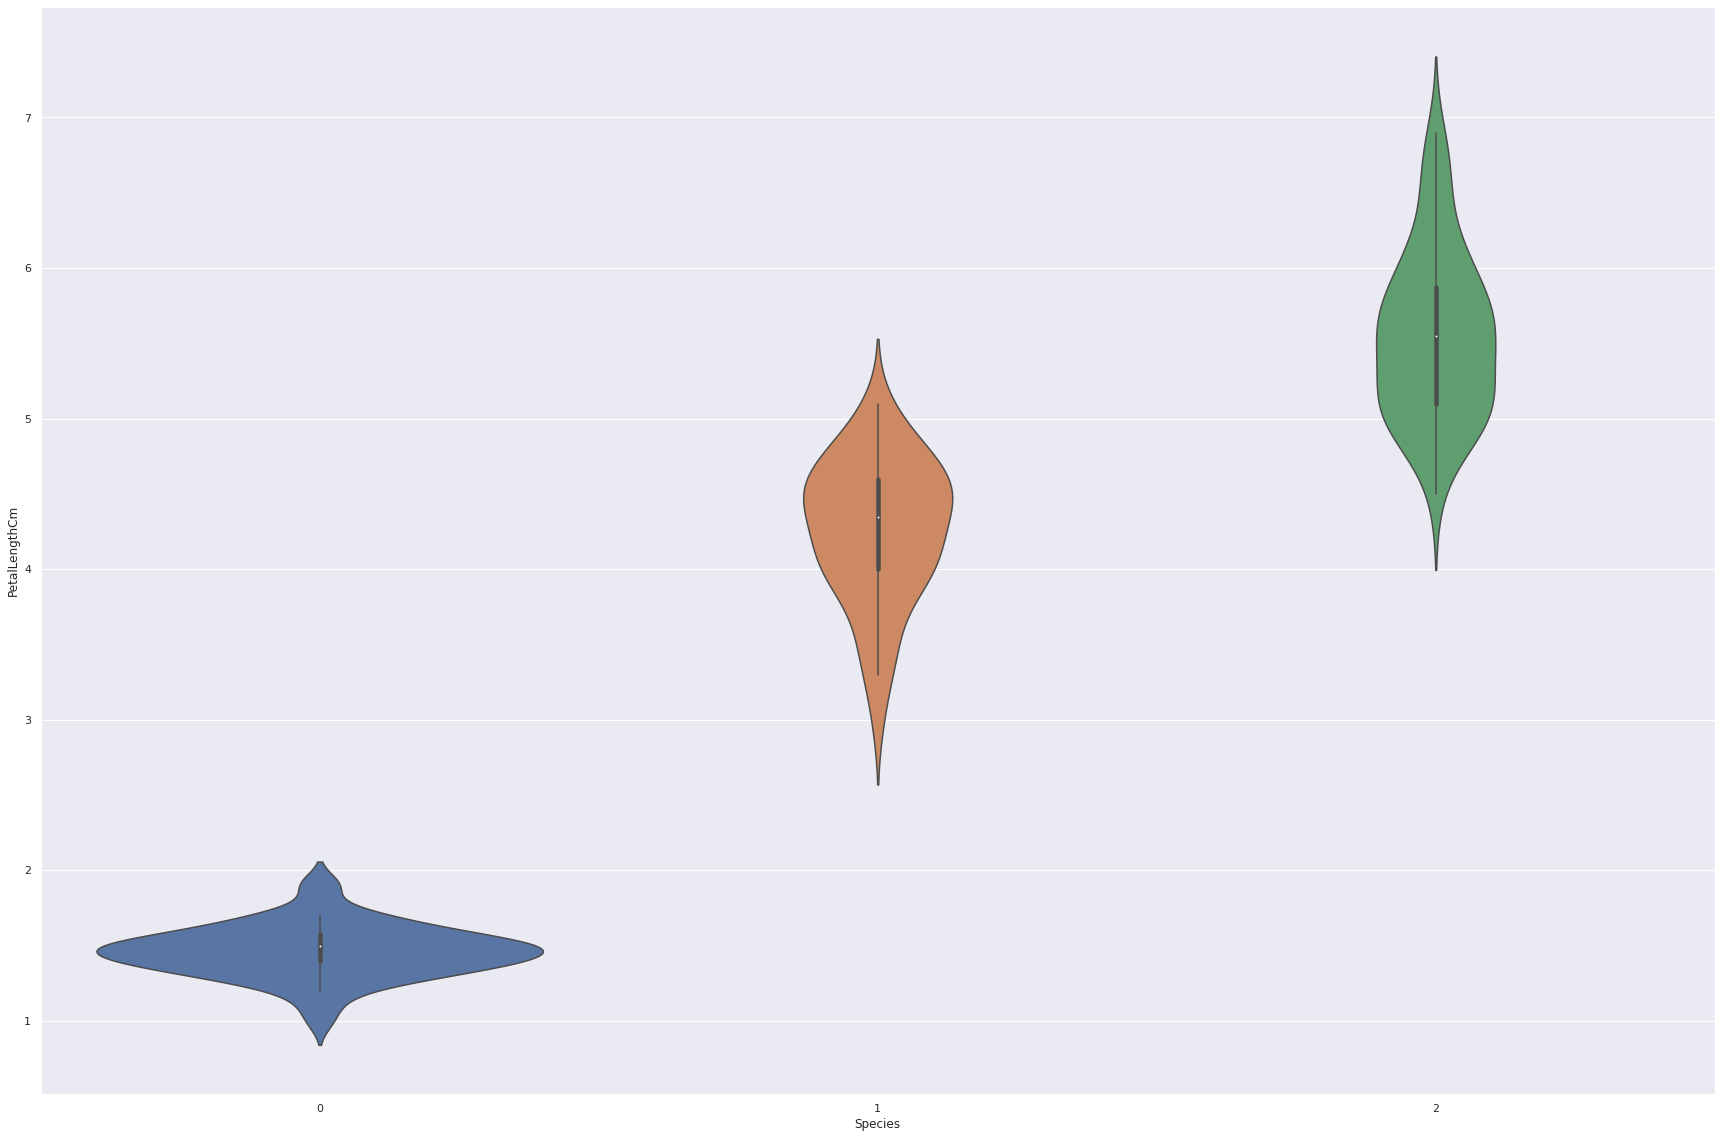

In [103]:
sns.violinplot(data=df,x="Species", y="PetalLengthCm")

In [104]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [105]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy of Decision Tree Classifier Model is: {} %'.format(accuracy*100))

The accuracy of Decision Tree Classifier Model is: 100.0 %


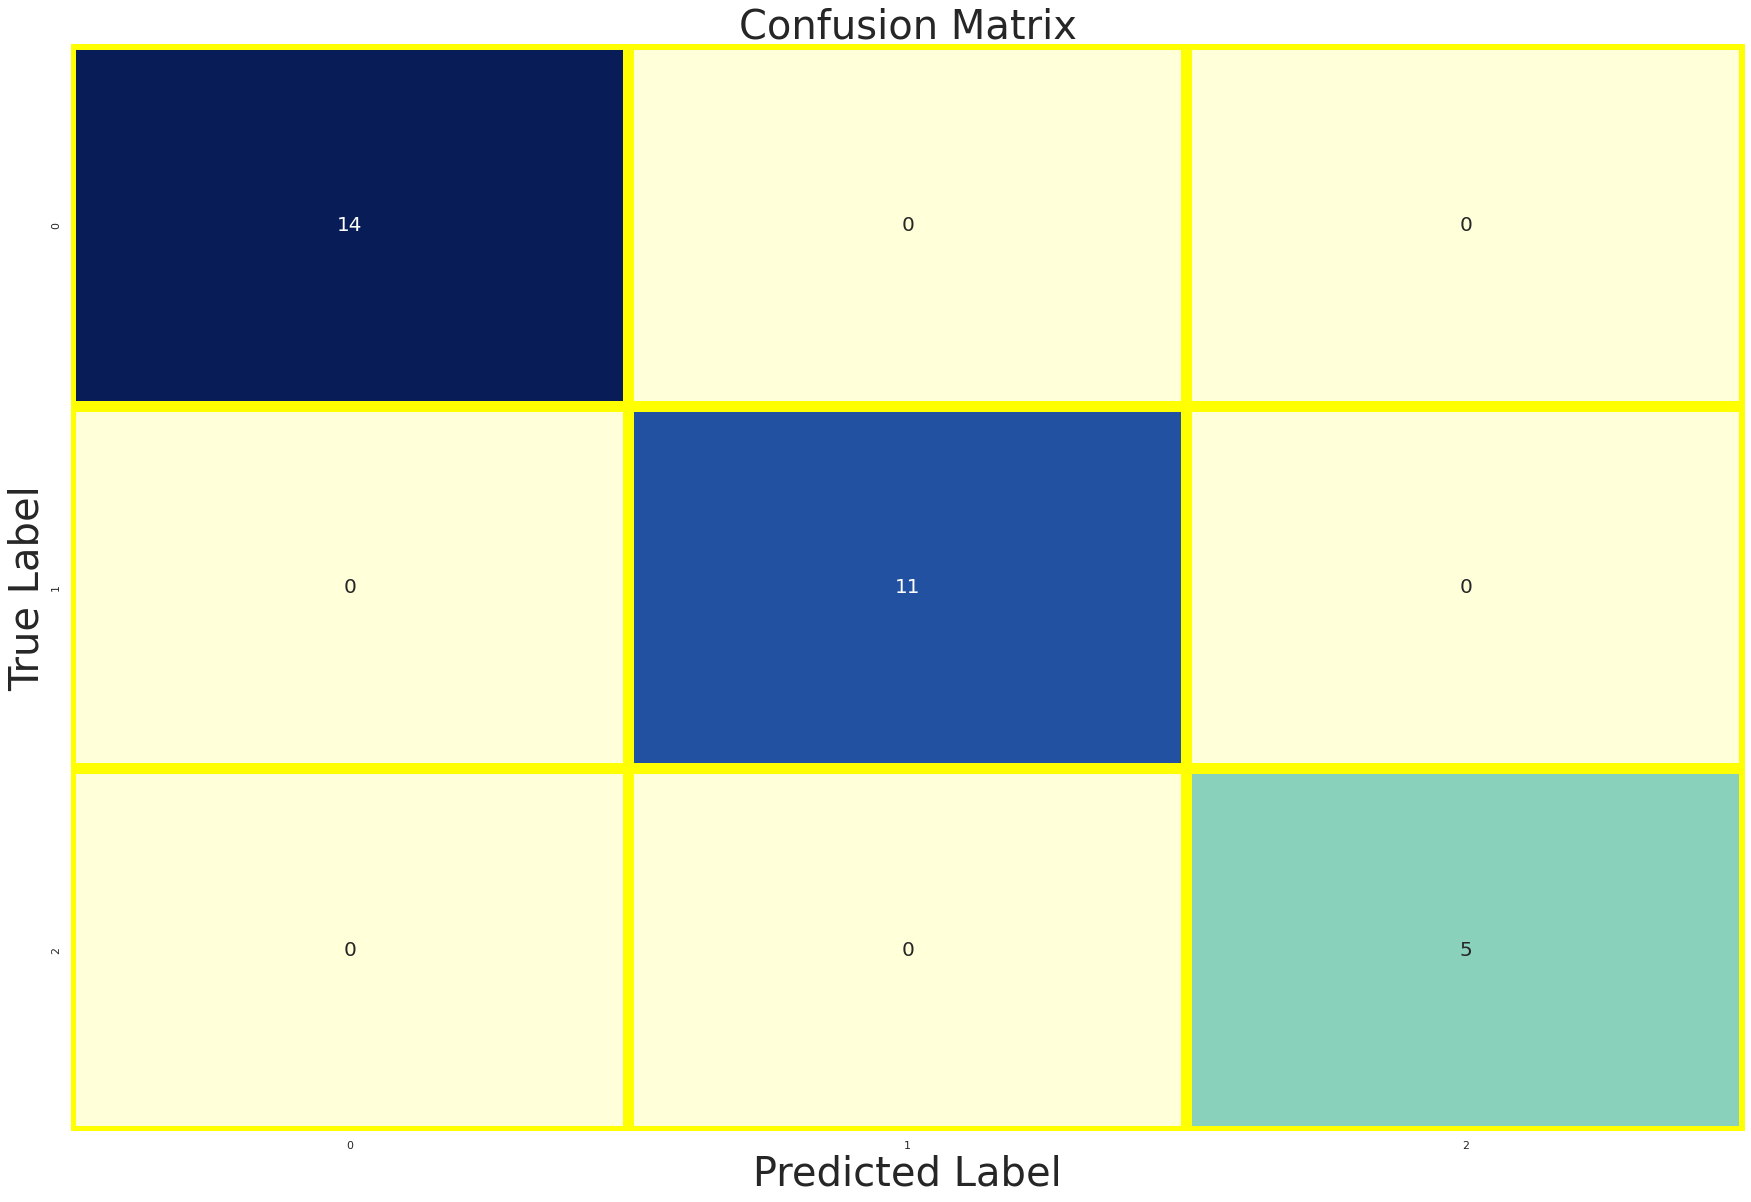

In [106]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            cbar=False,
            cmap = 'YlGnBu', 
            linecolor= 'yellow' , 
            linewidths= '10',
            annot_kws={'size': 20})
plt.ylabel('True Label',fontsize = 40)
plt.xlabel('Predicted Label',fontsize = 40)
plt.title('Confusion Matrix',fontsize = 40)
plt.show()

In [107]:
report = classification_report(y_test, y_pred)
print('The Classification report is as follows:\n\n{}'.format(report))

The Classification report is as follows:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [108]:
accuracies = cross_val_score(estimator = classifier,X = x_train,y = y_train, cv = 10)
print("Accuracy of k-Fold Cross Validation is: {}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy of k-Fold Cross Validation is: 100.0%
Standard Deviation: 0.00 %
